## Ejemplo de PCA en una nube de puntos 3D

### Breve introducción teórica
El **PCA** (Principal Component Analysis) es una técnica utilizada para reducir la dimensionalidad de un conjunto de datos intentando conservar la mayor cantidad de varianza posible.  
El PCA identifica las direcciones principales en las que los datos varían más. En este caso usaremos SVD para calcular los componentes principales.
### Ecuaciones
Dada una matriz de datos \(X\) con \(n\) muestras y \(m\) dimensiones, los pasos para realizar PCA usando SVD son los siguientes:
1. **Centrar los datos**: Restar la media de cada dimensión.
   $$
   X_{\text{centered}} = X - \mu
   $$
   donde $\mu$ es el vector de medias de cada dimensión.
2. **Calcular la descomposición en valores singulares (SVD)**:
    $$
    X_{\text{centered}} = U \Sigma V^T
    $$
   donde $U$ y $V$ son matrices ortogonales y $\Sigma$ es una matriz diagonal con los valores singulares.
3. **Seleccionar los primeros $k$ vectores propios** (columnas de $V$) para formar una nueva base.
4. **Transformar los datos** a la nueva base:
   $$
   X_{\text{reduced}} = X_{\text{centered}} V_k
   $$
5. **Visualizar los resultados**: Graficar los datos originales y los datos reducidos en 2D.

In [125]:
import numpy as np
import matplotlib.pyplot as plt

In [126]:
center = np.array([3, 10]) # centro
pAxis = np.array([2, 8]) # direccion del eje principal
theta = np.pi/4 # angulo de rotacion del eje principal

R = np.array([[np.cos(theta),-np.sin(theta)],
              [np.sin(theta), np.cos(theta)]])         # matriz de rotacion
nPoints = 10000
X = R @ np.diag(pAxis) @ np.random.randn(2,nPoints) + np.diag(center) @ np.ones((2,nPoints))

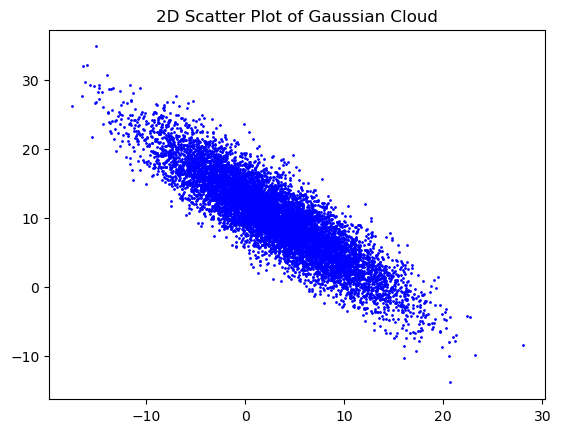

In [ ]:
# Grafica de la nube de puntos
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[0,:],X[1,:],s=1,color='b')
ax.set_title('2D Scatter Plot of Gaussian Cloud')
plt.show()

In [ ]:
# Calcular SVD
Xmean = np.mean(X,axis=1,keepdims=True)
Xc = X - Xmean
U, S, Vt = np.linalg.svd(Xc/np.sqrt(nPoints),full_matrices=False)

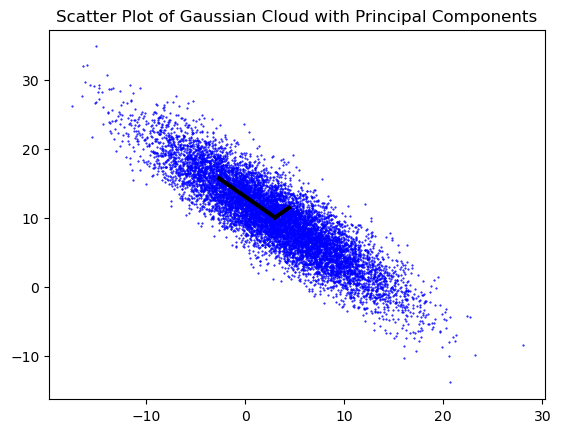

In [153]:
# Graficar Nube de puntos y componentes principales
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X[0,:],X[1,:],'.',markersize=1,color='b',label='Data points')
ax.plot(np.array([Xmean[0],Xmean[0]+U[0,0]*S[0]]),
         np.array([Xmean[1],Xmean[1]+U[1,0]*S[0]]),'-',color='k',linewidth=3) # Esto define un segmento de recta  que comienza 
                                                                              # en el centro de la nube y se extiende en la direccion 
                                                                              # del primer componente principal y con el largo 
                                                                              # proporcional a la desviacion estandar en esa direccion

ax.plot(np.array([Xmean[0], Xmean[0] + U[0,1]*S[1]]), 
        np.array([Xmean[1], Xmean[1] + U[1,1]*S[1]]), '-', color='k', linewidth=3)  # Segundo componente principal                                                    
ax.set_title('Scatter Plot of Gaussian Cloud with Principal Components')      
plt.show()

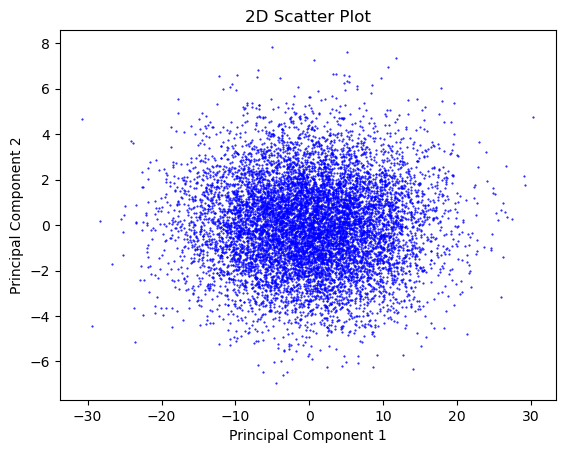

In [130]:
# Proyeccion de los datos sobre los componentes principales
X_pca = U.T @ Xc
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(X_pca[0,:],X_pca[1,:],'.',markersize=1,color='b')
ax.set_title('2D Scatter Plot')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
plt.show()

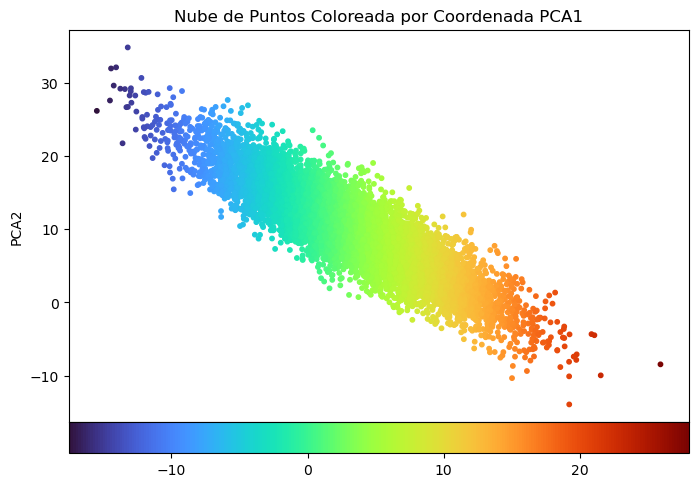

In [150]:
# Visualización de la nube de puntos coloreada según su componente en PCA1
# Esto es similar a proyectar los puntos sobre el primer componente principal
# y visualizar los puntos en el espacio original coloreados según su valor en PCA1.

colors = X[0,:] 

# 2. Crear la figura y el eje para el gráfico.
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# 3. Graficar la nube de puntos, coloreando cada punto según su valor en X.
scatter = ax.scatter(X[0,:], X[1,:], c=colors, cmap='turbo', s=10)

cbar = plt.colorbar(scatter, orientation='horizontal',pad=0)

ax.set_title('Nube de Puntos Coloreada por Coordenada PCA1')
ax.set_ylabel('PCA2')
ax.set_xticklabels([])
ax.set_xticks([])

plt.show()